In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_white
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# read data
returns = pd.read_excel('data/exam_3_data.xlsx', sheet_name='returns')

# OLS

## IYR regression on IEF

In [3]:
y = returns.IYR
X = returns.IEF

**a)**

In [4]:
model_1 = sm.OLS(y, sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IYR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5241
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.470
Time:                        23:07:30   Log-Likelihood:                 241.52
No. Observations:                 158   AIC:                            -479.0
Df Residuals:                     156   BIC:                            -472.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0134      0.004      3.156      0.002       0.005       0.022
IEF           -0.1784      0.246     -0.724      0.470      -0.665       0.308
==============================================================================
Omnibus:                       34.118   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.518
Skew:                           0.606   Prob(JB):                     9.39e-38
Kurtosis:                       7.943   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta^{IEF} = -0.1784$\
$R^{2} = 0.003$

**b)**\
An $R^{2}$ of 0.003 means that only 0.3\% of IYR is explained by IEF. This is very low and negligeable.\
Also, for an univariate regression the correlation can be direclty derived from the $R^{2}$ by taking the square root.\
Hence, we have $corr(IEF, IYR)=\sqrt{0.003}=0.055$. We can conclude that real estate returns do not seem to be sensitive to bond returns.

## IYR regression on IEF and SPY

In [5]:
X = returns[['IEF', 'SPY']]
model_2 = sm.OLS(y, sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IYR   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     102.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.46e-29
Time:                        23:07:30   Log-Likelihood:                 307.80
No. Observations:                 158   AIC:                            -609.6
Df Residuals:                     155   BIC:                            -600.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.003     -0.583      0.561      -0.008       0.004
IEF            0.6307      0.172      3.664      0.000       0.291       0.971
SPY            1.0281      0.072     14.271      0.000       0.886       1.170
==============================================================================
Omnibus:                       72.394   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.901
Skew:                           1.467   Prob(JB):                    9.41e-113
Kurtosis:                      11.352   Cond. No.                         62.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\beta^{IEF} = 0.6307$\
$R^{2} = 0.569$

**a) Correlation matrix of IYR, IEF, SPY**

In [6]:
returns[['IYR', 'IEF', 'SPY']].corr()

,IYR,IEF,SPY
IYR,1.000000,-0.057867,0.729377
IEF,-0.057867,1.000000,-0.329349
SPY,0.729377,-0.329349,1.000000


**b) Discussion**

The value of $\beta^{IEF}$ in 1. is smaller than the one in 2.\
Also, from the correlation matrix we can see that $corr(IYR, SPY)$ is much bigger than $corr(IYR, IEF)$. This means that most of the explanation of $IYR$ is carried by $SPY$.\
Given that $IEF$ has a slight negative correlation with $SPY$, $\beta^{IEF}$ in 2. is greater than $\beta^{IEF}$ in 1. to balance out the high $\beta^{SPY}$

##

Two assumptions on which the classical t-stats depend are:

1. There's no multicollinearity among the regressors.

2. Errors are independant and normally distributed.

Assumpion 1 is reasonable in this case. A correlation of $-0.329$ between IEF and SPY is fairly small. Also, the condition number of $62.8$ is ok.This means that the $X^{T}X$ matrix of regressors should be safely invertible.

For assumption 2, OLS asymptotically converges towards a normal distribution via the central limit theorem. In the eventuality that there's presence of serial correlation, we can safely assume that the law of large numbers will help mantain the consistency of the model.

# Forecasting

##

**a)**

In [7]:
y = returns.IYR.iloc[1:]
X = returns.IYR.shift(1).dropna()

In [8]:
model_3 = sm.OLS(y, sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IYR   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.733
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.190
Time:                        23:07:30   Log-Likelihood:                 256.15
No. Observations:                 157   AIC:                            -508.3
Df Residuals:                     155   BIC:                            -502.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.004      3.171      0.002       0.005       0.020
IYR           -0.0953      0.072     -1.316      0.190      -0.238       0.048
==============================================================================
Omnibus:                       17.481   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.543
Skew:                          -0.507   Prob(JB):                     5.20e-08
Kurtosis:                       5.025   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^{2} = 0.011$\
$\beta^{IYR} = -0.0953$

**b) Residuals**

<AxesSubplot:title={'center':'Residuals'}>

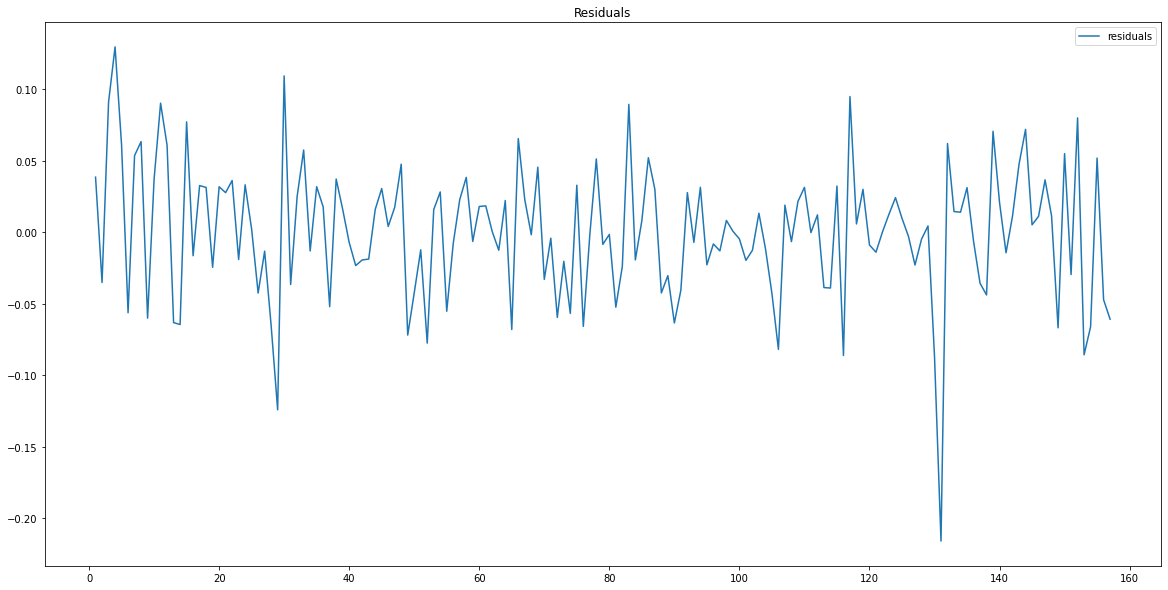

In [9]:
resiudals = pd.DataFrame(data=model_3.resid, index=X.index, columns=['residuals'])
resiudals.plot(title='Residuals', figsize=(20, 10))

There seems to be a fair amount of serial correlation

##

**a)** In the case of the multivariate regression the problem that would arise the most is the misspecified signifance levels and perhaps biased beta estimates in small samples.\
In large samples however, the central limit theorem and law of large numbers gives us confidence that beta should converge towards its true value.

**b)** In the case of autoregression, all the above mentioned problems can arise. Having serial correlation prevents OLS to be consistent. Which is problematic in both small and large sample estimates of beta.

##

**a)** Yes, the estimated beta would change and we would have a nearly perfect r-squared.

**b)** The **price** is not a stationary time series. This means that the variance is undefined and this breaks most of the assumptions on which OLS relies.


## Volatility forecast

In [10]:
FREQ = 12
dbc = returns.set_index('date')[['DBC']]

### Expanding Window
var = (dbc**2).shift(1).expanding(min_periods=2*FREQ).mean().rename(columns={'DBC':'Expanding Window'})

### Rolling Window
var['Rolling Window'] = (dbc**2).shift(1).rolling(window=2*FREQ).mean() 

### Garch
GARCH = arch_model(dbc, vol='Garch', p=1, o=0, q=1, dist='Normal')
GARCH_model = GARCH.fit()
GARCH_model.params

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2096374.5848787487
Iteration:      2,   Func. Count:     16,   Neg. LLF: 186.1092336503408
Iteration:      3,   Func. Count:     24,   Neg. LLF: -241.9350083830496
Iteration:      4,   Func. Count:     30,   Neg. LLF: -239.9824475159594
Iteration:      5,   Func. Count:     37,   Neg. LLF: -242.30981900903456
Iteration:      6,   Func. Count:     43,   Neg. LLF: -228.4572895151698
Iteration:      7,   Func. Count:     49,   Neg. LLF: -245.04432424194397
Iteration:      8,   Func. Count:     54,   Neg. LLF: -245.0452965095418
Iteration:      9,   Func. Count:     59,   Neg. LLF: -245.0454558065374
Iteration:     10,   Func. Count:     64,   Neg. LLF: -245.0454672822969
Iteration:     11,   Func. Count:     68,   Neg. LLF: -245.0454672825398
Optimization terminated successfully    (Exit mode 0)
            Current function value: -245.0454672822969
            Iterations: 11
            Function evaluations: 68
            Gradient ev

mu          0.001878
omega       0.000193
alpha[1]    0.111195
beta[1]     0.818933
Name: params, dtype: float64

In [11]:
var_1 = (0.15 * (1 / (12**0.5)))**2
var[['GARCH']] = None
var.iloc[0,2:] = (dbc.iloc[:FREQ*2]**2).mean() 
for i in range(1, len(var)):
    var['GARCH'].iloc[i] = GARCH_model.params['omega'] + var['GARCH'].iloc[i-1] * GARCH_model.params['beta[1]'] + GARCH_model.params['alpha[1]']*(dbc.iloc[i-1,0]**2)
var = var.dropna()

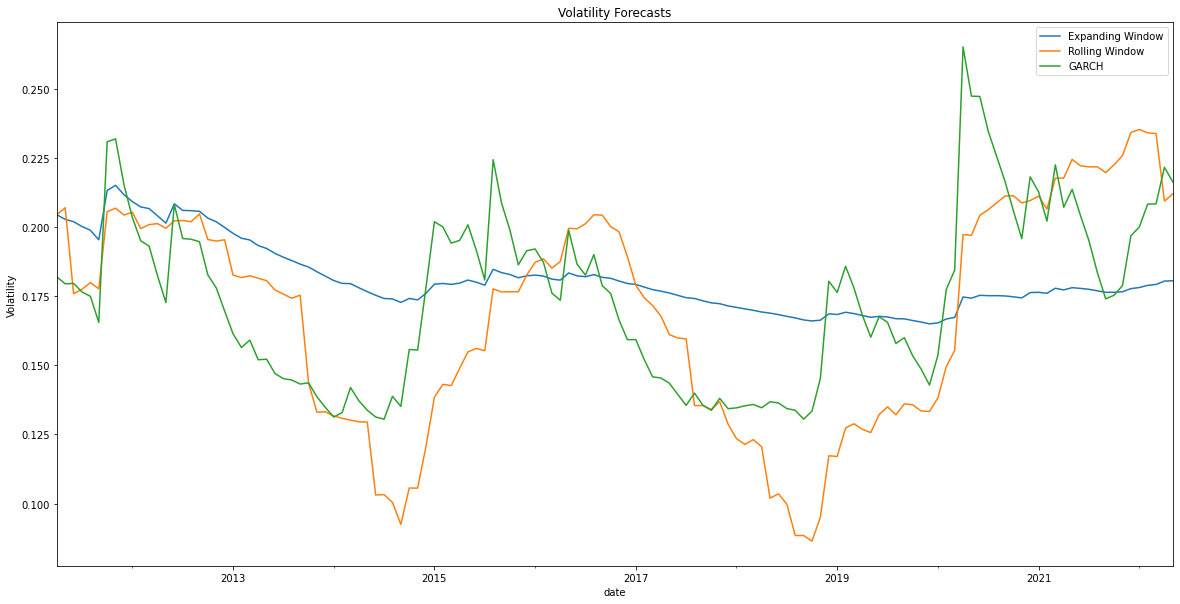

In [12]:
vol = (var * FREQ)**.5

vol.plot(figsize=(20, 10))
plt.title('Volatility Forecasts')
plt.ylabel('Volatility')

plt.show()

In [13]:
vol.loc[['2020-04-30','2022-05-31']]

,Expanding Window,Rolling Window,GARCH
date,,,
2020-04-30,0.174661,0.197237,0.265092
2022-05-31,0.180528,0.211956,0.216245


# Penalized Regression

In [14]:
# split data into train and test
test_start = 2020
X_train, y_train = \
    returns.loc[returns.date.dt.year < test_start].drop(columns=['date', 'IYR']), returns.loc[returns.date.dt.year < test_start].IYR
X_test, y_test = \
    returns.loc[returns.date.dt.year >= test_start].drop(columns=['date', 'IYR']), returns.loc[returns.date.dt.year >= test_start].IYR

## Estimated betas for each model

In [15]:
results_df ={'model': ['OLS', 'Ridge', 'Lasso']}
for regressor in X_train.columns:
    results_df[regressor] = [0]*3
results_df = pd.DataFrame(results_df)

In [16]:
# OLS
model_ols = LinearRegression().fit(X_train, y_train)
results_df.loc[results_df.model=='OLS', 1:] = model_ols.coef_

# Ridge
model_ridge = Ridge(alpha=0.5).fit(X_train, y_train)
results_df.loc[results_df.model=='Ridge', 1:] = model_ridge.coef_

# Lasso
model_lasso = Lasso(alpha=2e-4).fit(X_train, y_train)
results_df.loc[results_df.model=='Lasso', 1:] = model_lasso.coef_

display(results_df)

,model,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IEF,BWX,TIP
0,OLS,0.907861,0.052678,0.108224,0.043854,-1.644597,1.090110,-0.218789,0.800986,0.045176,0.322144
1,Ridge,0.109550,0.095692,0.114033,0.156768,0.021400,0.100272,-0.026863,0.029078,0.031652,0.027307
2,Lasso,0.135772,0.000000,0.051035,0.299599,0.000000,0.429314,-0.057299,0.000000,0.000000,0.000000


## Regressor correlation matrix

In [17]:
X_train.corr()

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IEF,BWX,TIP
SPY,1.000000,0.866534,0.770723,0.880032,0.789765,0.723324,0.532333,-0.430732,0.347099,-0.025633
EFA,0.866534,1.000000,0.864663,0.903705,0.804057,0.744558,0.584627,-0.362262,0.553046,0.069738
EEM,0.770723,0.864663,1.000000,0.818276,0.788988,0.734362,0.596593,-0.272977,0.601506,0.188517
PSP,0.880032,0.903705,0.818276,1.000000,0.755128,0.811265,0.501326,-0.402218,0.429549,0.015117
QAI,0.789765,0.804057,0.788988,0.755128,1.000000,0.698436,0.565595,-0.100092,0.601683,0.280105
HYG,0.723324,0.744558,0.734362,0.811265,0.698436,1.000000,0.500861,-0.205746,0.453230,0.129386
DBC,0.532333,0.584627,0.596593,0.501326,0.565595,0.500861,1.000000,-0.346769,0.443634,0.106506
IEF,-0.430732,-0.362262,-0.272977,-0.402218,-0.100092,-0.205746,-0.346769,1.000000,0.264023,0.709324
BWX,0.347099,0.553046,0.601506,0.429549,0.601683,0.453230,0.443634,0.264023,1.000000,0.502828
TIP,-0.025633,0.069738,0.188517,0.015117,0.280105,0.129386,0.106506,0.709324,0.502828,1.000000


There is presence of multicollinearity among the regressors. This breaks assumption 1 of OLS related to having a full rank matrix and would make it harder for the model to precisely identiy $\beta$.

###

Similar to OLS, Ridge uses all the regressors. However, the scale of the regressors in Ridge tend to be smaller than in OLS.\
Ridge is useful when dealing with multicollinearity because by reducing the betas it scales the diagonal of the regressors covariance matrix to break any linear dependence among them. 

###

Lasso, on the other hand, heavily penalizes values that are different from 0. This encourages "non-relevant" regressors to be zero.\
However, similar to OLS, Lasso will tend to assign high values to the non-zero regressors.\
Lasso is very useful for feature selection as it will tend to nullify regressors that are detrimental to minimizing the loss function.\
This helps greatly in reducing the model variance which is good for out-of-sample performance.

### out-of-sample estimates

In [18]:
scores_df =pd.DataFrame({'model': ['OLS', 'Ridge', 'Lasso'], 
                         'r-squared':[model_ols.score(X_test, y_test),
                                      model_ridge.score(X_test, y_test),
                                      model_lasso.score(X_test, y_test)]})
display(scores_df)

,model,r-squared
0,OLS,0.475652
1,Ridge,0.605911
2,Lasso,0.728237
